<a href="https://colab.research.google.com/github/FerrerSilver/Projeto/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

**NumPy**

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (**MEDIUM**, 2018).

**Pandas**

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências. EX: alterar algumas das configurações de exibição do Pandas para alterar quantas linhas e colunas são mostradas e com que precisão os números de ponto flutuante são exibidos (**medium**, 2020)

**Matplotlib**

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (**MEDIUM**, 2020). 

**Seaborn**

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (**VOOOO**, 2017).

**Scipy/scipy.stats**

O SciPy é o pacote principal de rotinas científicas em Python, que se destina a operar de forma eficiente em matrizes numpy, de modo que numpy e scipy trabalhem lado a lado. scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc (**UFPR**, ?).

**Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens (**PYTHON**, ?)




#Adicionando o dado exato nos gráficos em barras horizontais

In [ ]:
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

#Importação dos dados

In [ ]:
dados = pd.read_csv('ocorrencias_cenipa.csv')

#Dados por região

In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

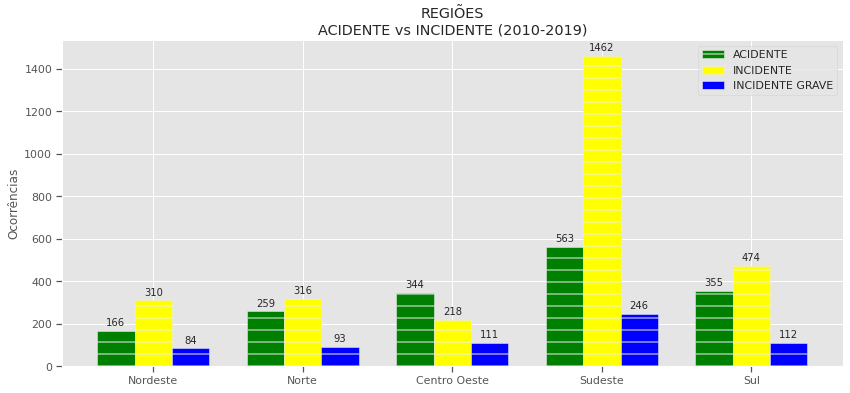

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))


width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE' ,color = 'green',hatch = '-')
rects2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE', color = 'yellow', hatch = '-')
rects3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE', color = 'blue', hatch = '-')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)
numero_em_cima(rects3, ax)

plt.show()

Conforme análise dos gráficos obtidos e pesquisas sobre as regiões, concluímos que o Sudeste é a região que mais concentra ocorrências em geral em número absolutos, visto que, o maior volume de voos (45%) ocorrem nesta região.

A região que menos acidentes e incidentes graves ocorreram no Nordeste, visto que o volume de voos é menor que a metade da anterior (21,5%).

A região que menos incidentes ocorreram no Centro-Oeste, assim como a anterior, possui um volume menor de voos (12%).

#Percentual de Ocorrências

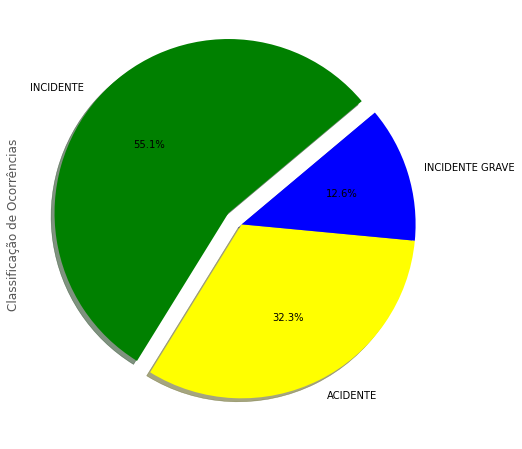

In [ ]:
plt.style.use("ggplot")

explode = (0.1 ,0 ,0 )

colors = ['green', 'yellow', 'blue',]

dados['tipo'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Classificação de Ocorrências" , shadow=True , colors=colors , explode=explode , startangle=40 ,figsize=(8, 8))

plt.show()

Podemos observar que os incidentes, menos graves, são os tipos de ocorrência mais comums, com 55,1% do total.

Incidentes graves representam 12,6% e os acidentes, 32,3% do total. Esses dados estão totalmente relacionadas a segurança do transporte aéreo, sendo este, número 2 no quesito segurança.

# Ocorrências por tipo de aeronave


In [ ]:
aeronave_tipo = Counter(dados['aeronave_tipo'])


tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)


contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

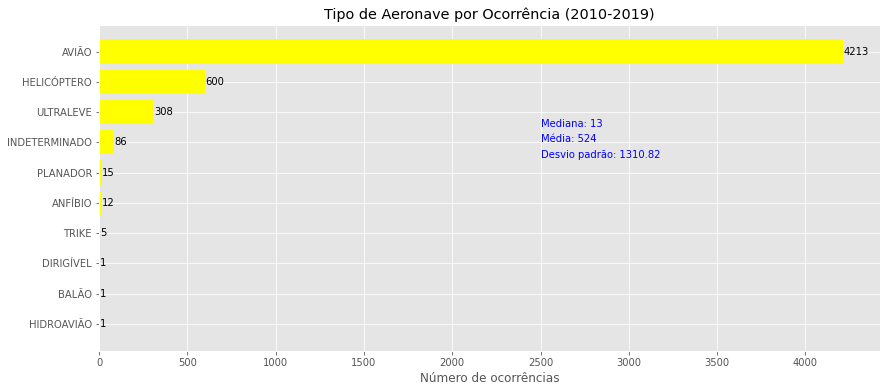

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=tipo
y=contador_tipo

rects1=ax.barh(x, y, color = 'yellow')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Tipo de Aeronave por Ocorrência (2010-2019)')

plt.text(2500, 2.5, 'Mediana: %d'%(np.median(np.array(contador_tipo))), color = 'blue')
plt.text(2500, 3.0, 'Média: %d'%(np.mean(np.array(contador_tipo))), color = 'blue')
plt.text(2500, 3.5, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo)), color = 'blue')

plt.show()

O avião é onde ocorre a maioria das ocorrências.
Os dos tipos Dirígel, Balão, Hidroavião são os que tiveram menos ocorrências aconteceram nesse período (2010-2019). 
A média de 524 é alta devido a alta quantidade de ocorrências de avião que é exorbitante dos demais. 
O desvio padrão é alto pelo mesmo motivo anterior.

#Ocorrências por dia, por mês e por ano

In [ ]:
dados['data'] = pd.to_datetime(dados['data'])
dados['Mes'] = dados['data'].map(lambda x: x.month)
dados['Dia'] = dados['data'].map(lambda x: x.day)

In [ ]:
ocorrencias_por_mes = Counter(dados['Mes'])
meses = (list(ocorrencias_por_mes.keys()))
ocorrencia_mes = (list(ocorrencias_por_mes.values()))

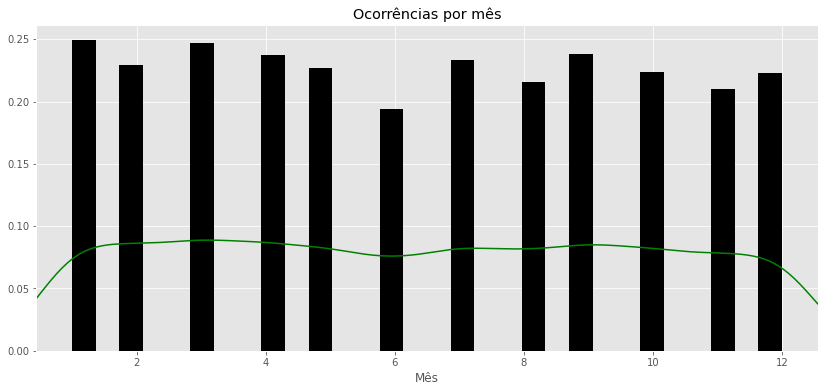

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=dados.Mes


plt.hist(x, density=True, bins=30 , color = 'black')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF", color = 'green')
plt.xlabel('Mês')
plt.title('Ocorrências por mês')

plt.show()

O mes de Janeiro foi o mês que mais ocorrências ocorreram, devido ao alto volume de viagens nesse periodo.

Junho foi o mês em que menos ocorrências ocorreram, devido ao baixo volume de viagens nesse periodo.

A média de ocorrências por mês foi de 436.

In [ ]:
ocorrencias_por_dia = Counter(dados['Dia'])
dia = list(ocorrencias_por_dia.keys())
ocorrencia_dia = list(ocorrencias_por_dia.values())

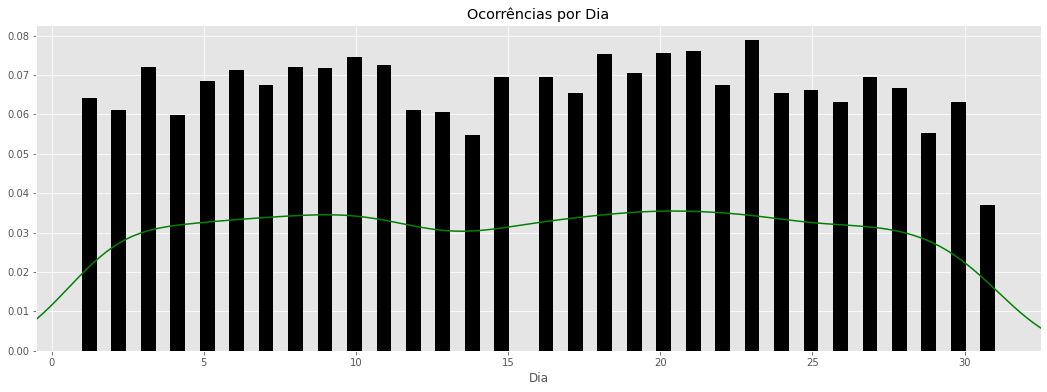

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x = dados.Dia
plt.hist(dados.Dia, density=True, bins= 62 , color = 'black')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF" , color = 'green')
plt.xlabel('Dia')
plt.title('Ocorrências por Dia')

plt.show()

Dia 23 foi o dia no mês onde mais ocorrências aconteceram.

Dia 31 foi o dia no mês onde menos ocorrências aconteceram.

A média de ocorrências por dia foi de 169

In [ ]:
ocorrencias_por_ano = Counter(dados['ano'])
ano = list(ocorrencias_por_ano.keys())
ocorrencia_ano = list(ocorrencias_por_ano.values())

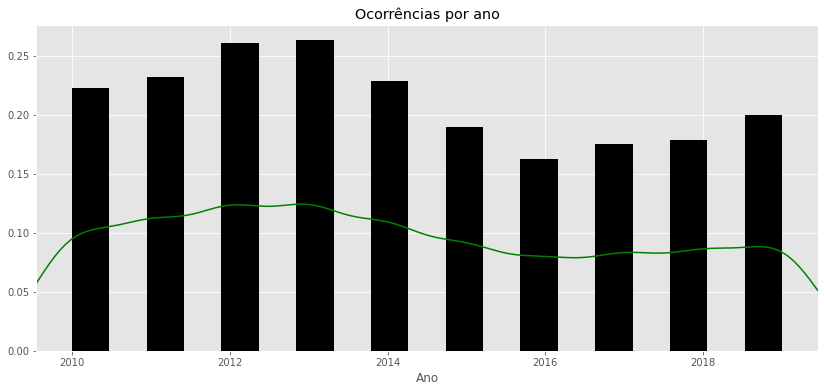

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))
x= dados.ano
plt.hist(x, density=True, bins= 19 , color = 'black')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF" , color = 'green')
plt.xlabel('Ano')
plt.title('Ocorrências por ano')
plt.show()

O ano em que mais ocorrências ocorreram foi no de 2013.

O ano em que menos ocorrências ocorreram foi no de 2016.

Considerando os anos analisados metade deles superam mais de 500 ocorrências, a média de occorencias foi de 524.

O fator de segurança é fundamental na queda dos números, todavia a acessibilidade à aviação e maior volume de voos pode ocasionar o aumento dos mesmos.

Atualmente a tendencia de alta nas ocorrências, visto que desde 2017, os números são maiores quando comparados ao ano anterior.

#Tipo de Ocorrência por ano

In [ ]:
tipos_operacao = list(set(dados['ano']))

todos_incidentes = list(dados.loc[(dados['tipo']) == 'INCIDENTE', ['ano']]
                         ['ano'])

qtd_incidentes_ano = pd.DataFrame({'ano': tipos_operacao, 'Incidentes': [todos_incidentes.count(i) for i in tipos_operacao]})

qtd_incidentes_ano = qtd_incidentes_ano.sort_values(['Incidentes'])

soma_inc = qtd_incidentes_ano['Incidentes'].sum()

In [ ]:
tipos_operacao = list(set(dados['ano']))
todos_incidentes_graves = list(dados.loc[(dados['tipo']) == 'INCIDENTE GRAVE', ['ano']]
                         ['ano'])
qtd_incidentes_graves_ano = pd.DataFrame({'ano': tipos_operacao, 'Incidentes Graves': [todos_incidentes_graves.count(i) for i in tipos_operacao]})
qtd_incidentes_graves_ano = qtd_incidentes_graves_ano.sort_values(['Incidentes Graves'])
soma_inc_grv= qtd_incidentes_graves_ano['Incidentes Graves'].sum()

In [ ]:
tipos_operacao = list(set(dados['ano']))
todos_acidentes = list(dados.loc[(dados['tipo']) == 'ACIDENTE', ['ano']]
                         ['ano'])
qtd_acidentes_ano = pd.DataFrame({'ano': tipos_operacao, 'Acidentes': [todos_acidentes.count(i) for i in tipos_operacao]})
qtd_acidentes_ano = qtd_acidentes_ano.sort_values(['Acidentes'])
soma_ac= qtd_acidentes_ano['Acidentes'].sum()

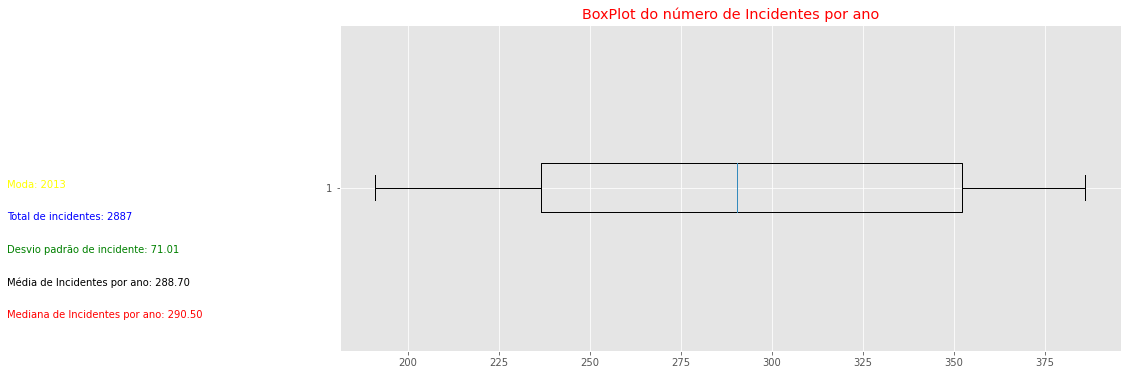

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))

plt.text(90, 0.6, 'Mediana de Incidentes por ano: %.2f'%(np.median(np.array(qtd_incidentes_ano['Incidentes']))), color = 'red')
plt.text(90, 0.7, 'Média de Incidentes por ano: %.2f'%(np.mean(np.array(qtd_incidentes_ano['Incidentes']))), color = 'black')
plt.text(90, 0.8, 'Desvio padrão de incidente: %.2f'%(static.stdev(todos_incidentes.count(i) for i in tipos_operacao)), color = 'green')
plt.text(90, 0.9, 'Total de incidentes: %d'%(soma_inc), color = 'blue')
plt.text(90, 1.0, 'Moda: %d'%(static.mode(todos_incidentes)), color = 'yellow')
plt.boxplot(qtd_incidentes_ano['Incidentes'], 0, 'rs', 0)
plt.title('BoxPlot do número de Incidentes por ano' , color = 'red')
plt.show()


Observa-se que nesse período houve 2887 incidentes, sendo que por ano, em média, foram registrados 288,7.

O maior número de incidentes graves (386) aconteceram no ano de 2013 e a menor quantidade (191), foi em 2016.

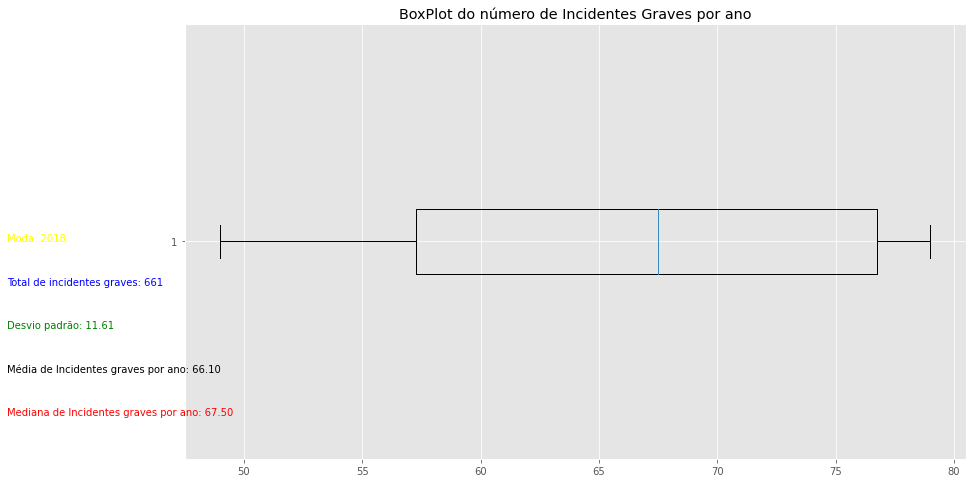

In [ ]:
fig,ax = plt.subplots(figsize=(14, 8))

plt.text(40, 0.6, 'Mediana de Incidentes graves por ano: %.2f'%(np.median(np.array(qtd_incidentes_graves_ano['Incidentes Graves']))), color= 'red')
plt.text(40, 0.7, 'Média de Incidentes graves por ano: %.2f'%(np.mean(np.array(qtd_incidentes_graves_ano['Incidentes Graves']))), color = 'black')
plt.text(40, 0.8, 'Desvio padrão: %.2f'%(static.stdev(todos_incidentes_graves.count(i) for i in tipos_operacao)), color = 'green')
plt.text(40, 0.9, 'Total de incidentes graves: %d'%(soma_inc_grv), color = 'blue')
plt.text(40, 1.0, 'Moda: %d'%(static.mode(todos_incidentes_graves)), color = 'yellow')

plt.boxplot(qtd_incidentes_graves_ano['Incidentes Graves'], 0, 'rs', 0)
plt.title('BoxPlot do número de Incidentes Graves por ano')
plt.show()

Nesse período aconteceram 661 incidentes graves, sendo que por ano, em média, foram registrados 66.10.

O maior número de incidentes (79) aconteceu no ano de 2018 e a menor quantidade (49), em 2016.

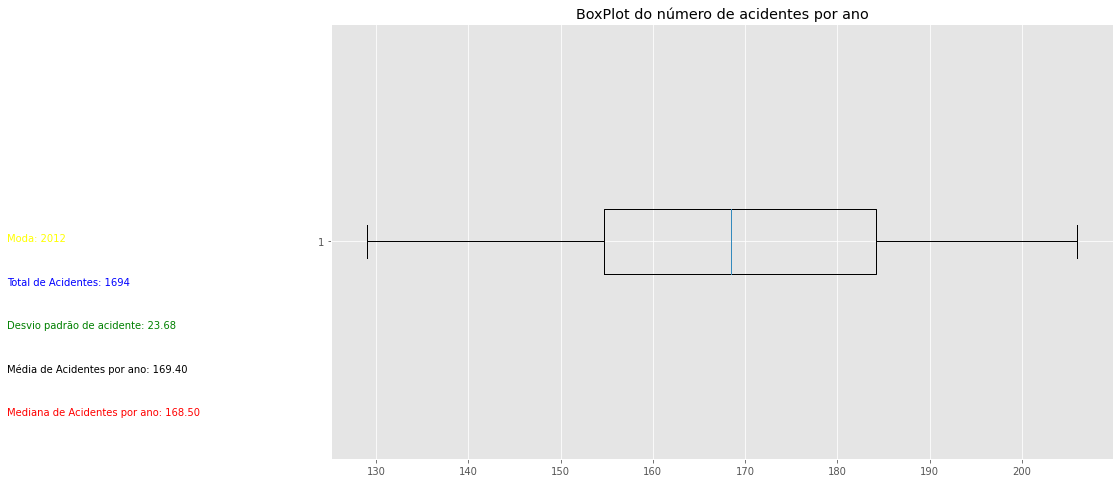

In [ ]:
fig,ax = plt.subplots(figsize=(14, 8))

plt.text(90, 0.6, 'Mediana de Acidentes por ano: %.2f'%(np.median(np.array(qtd_acidentes_ano['Acidentes']))), color = 'red')
plt.text(90, 0.7, 'Média de Acidentes por ano: %.2f'%(np.mean(np.array(qtd_acidentes_ano['Acidentes']))), color = 'black')
plt.text(90, 0.8, 'Desvio padrão de acidente: %.2f'%(static.stdev(todos_acidentes.count(i) for i in tipos_operacao)), color = 'green')
plt.text(90, 0.9, 'Total de Acidentes: %d'%(soma_ac), color = 'blue')
plt.text(90, 1.0, 'Moda: %d'%(static.mode(todos_acidentes)), color = 'yellow')

plt.boxplot(qtd_acidentes_ano['Acidentes'], 0, 'rs', 0)
plt.title('BoxPlot do número de acidentes por ano')
plt.show()

Nesse período aconteceram 1694 acidentes, sendo que por ano, em média, foram registrados 169.40.

O maior número de acidente (206) ocorreram no ano de 2012 e a menor quantidade (129), em 2010.

#Ocorrências por estado

In [ ]:
estado = Counter(dados['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

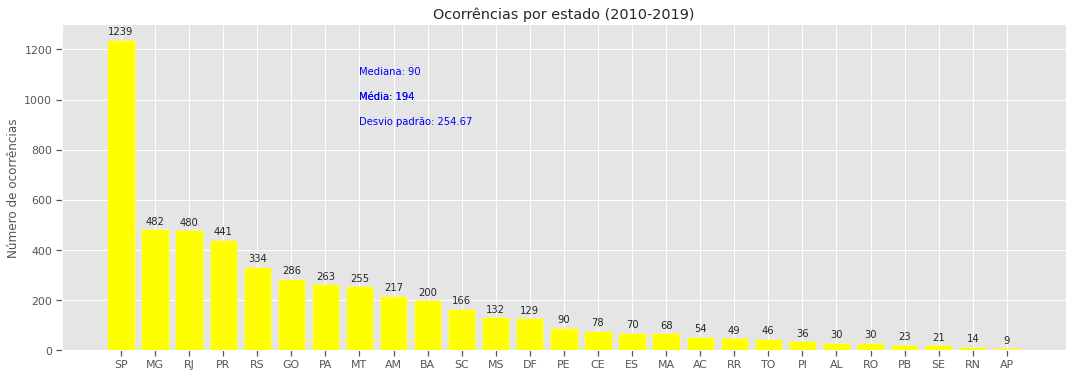

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='yellow')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por estado (2010-2019)')
plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))), color = 'blue')
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))), color = 'blue')
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))), color = 'blue')
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)), color = 'blue')   

numero_em_cima(rects1, ax)

plt.show()

O estado em que a maior quantidade de ocorrências nesse período foi São Paulo SP com 1239, visto que, concentra 45% dos voos comerciais, e grande volume de voos privados.

O estado com menor quantidade de ocorrências foram no Amapá AP, com apenas 9, devido a baixa demanda de voos.

A média de ocorrência por estado ficou em 194 durante esse período. Quantidade elevada, em razão aos altos dados de São Paulo.

#Ocorrências por cidade

In [ ]:
cidade = Counter(dados['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

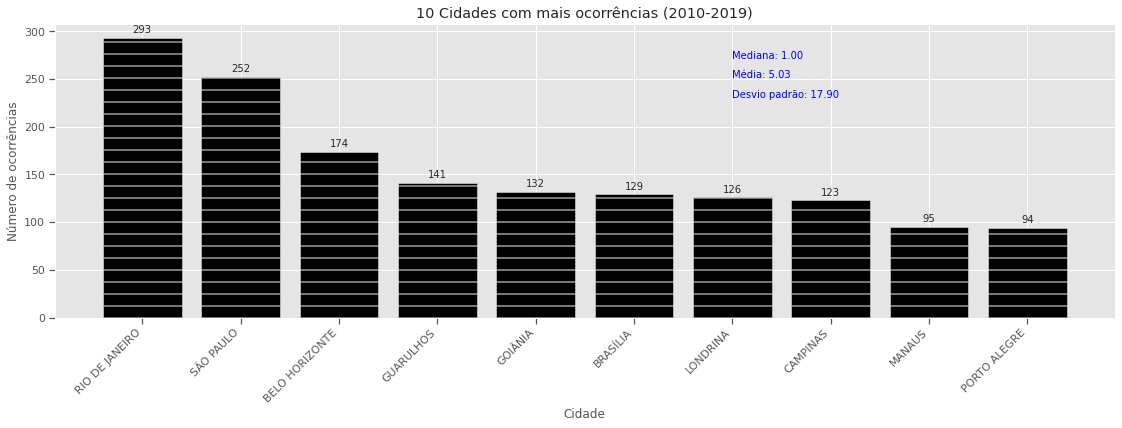

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=fase_cidade[:10]
y=contador_cidade[:10]

rects1=ax.bar(x, y, color = 'black',hatch='-')

plt.xlabel('Cidade')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('10 Cidades com mais ocorrências (2010-2019)')
plt.text(6, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))), color = 'blue')
plt.text(6, 250.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))) , color = 'blue')
plt.text(6, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)), color = 'blue')   

numero_em_cima(rects1, ax)

plt.show()


A cidade com maior quantidade de ocorrências nesse período foi Rio de Janeiro RJ com 293, visto que além da alta demanda de voos comerciais e privados,a geografia do relevo não é menos favorável.

Dos 5568 municípios do Brasil, 1042 tiveram pelo menos 1 ocorrência aeronáutica e isso corresponde a 18,71% das cidades brasileiras.

A média de ocorrências por cidade ficou em 5.03 durante esse período.

A porcentagem de ocorrências das 10 cidades corresponde a 29% do total

#Ocorrências por fase de Operação

In [ ]:
aeronave_fase_operacao = Counter(dados['aeronave_fase_operacao'])
aeronave_fase = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)


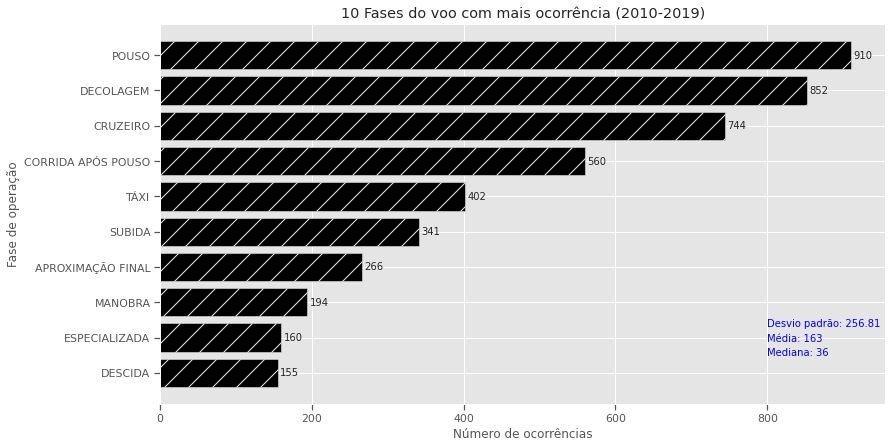

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=aeronave_fase[:10]
y=contador_aeronave_fase_operacao[:10]

ax.barh(x, y, color='black',hatch='/')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')


ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.title('10 Fases do voo com mais ocorrência (2010-2019)')
plt.text(800, 8.5, 'Mediana: %d'%(np.median(np.array(contador_aeronave_fase_operacao))),color = 'blue')
plt.text(800, 8.1, 'Média: %d'%(np.mean(np.array(contador_aeronave_fase_operacao))),color = 'blue')
plt.text(800, 7.7, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fase_operacao)),color = 'blue')

plt.show()

A fase em que apresentaram mais ocorrências (910) neste período foram o Pouso, devido ao alto número de variáveis possiveis.

As fases que menos ocorrências (1) apresentaram foram: EMPREGO MILITAR e MUDANÇA DE NÍVEL OU ALTITUDE

A média por fase nesse período ficou em 163 ocorrências.

A porcentagem de ocorrências das 10 fases do voo corresponde a 87% do total

#Ocorrências por ano de fabricação da aeronave

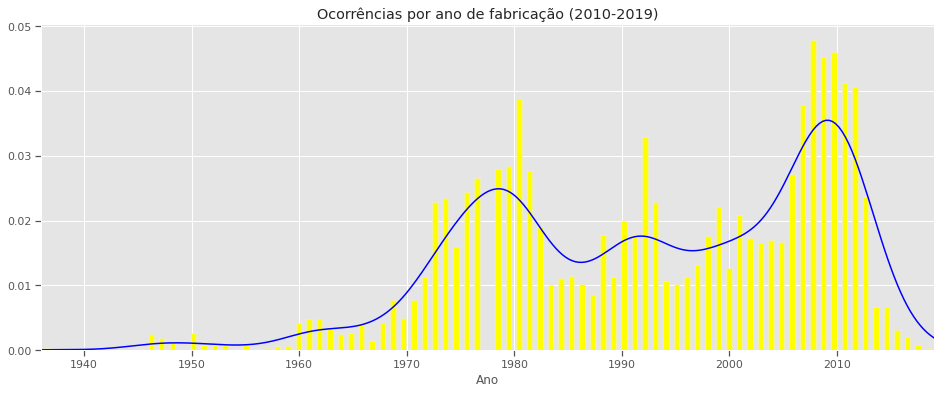

In [ ]:
plt.style.use("ggplot")

fig, axes = plt.subplots(figsize=(16,6))

x=dados.aeronave_ano_fabricacao
plt.hist(x, density=True, bins=85, rwidth=0.5 ,color= 'yellow')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
axes.set_xlim(xmin=1936) 
axes.set_xlim(xmax=2019) 
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",color='blue')
plt.xlabel('Ano')
plt.title('Ocorrências por ano de fabricação (2010-2019)')

plt.show()

O ano de fabricação que apresentou mais ocorrências (229) nesse período foi o de 2008

Os anos de fabricação que menos ocorrências (1) ocorreram foi nos anos 1956,1940,1954,1945 e 1942

A média por ano de fabricação nesse período ficou em 67 ocorrências.

A porcentagem de ocorrências das 10 anos de fabricação (considerando o ano Indeterminado), corresponde a 39,31% do total

#Principais ocorrências

In [ ]:
descricao = Counter(dados['descricao'])
fase_descricao = sorted(descricao, key = descricao.get, reverse = True)
contador_descricao = sorted(list(descricao.values()), reverse = True)

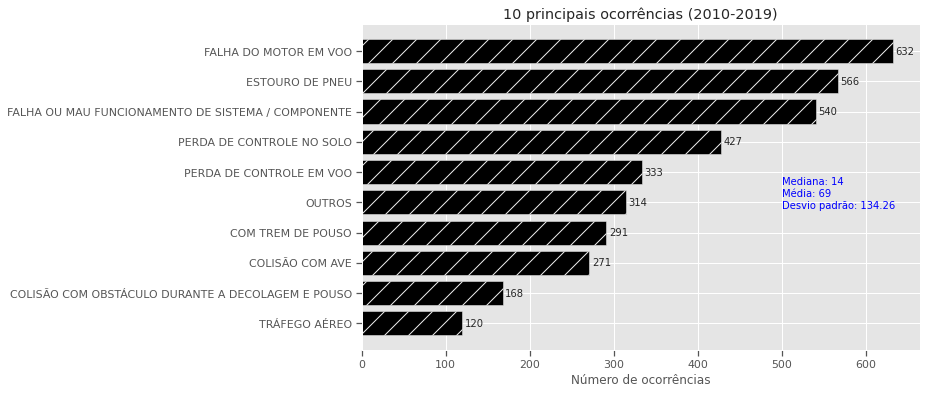

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 6))

x=fase_descricao[:10]
y=contador_descricao[:10]

ax.barh(x, y, color='black',hatch='/')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('10 principais ocorrências (2010-2019)')
plt.text(500, 4.4, 'Mediana: %d'%(np.median(np.array(contador_descricao))), color='blue')
plt.text(500, 4.8, 'Média: %d'%(np.mean(np.array(contador_descricao))), color='blue')
plt.text(500, 5.2, 'Desvio padrão: %.2f'%(static.stdev(contador_descricao)), color='blue')

plt.show()

A ocorrência que mais ocorreu (632) neste período foi a Falha do motor em voo. Os problemas de válvulas estão geralmente associados ao emperramento da válvula junto à guia de válvula ou quebra da haste. Tais problemas decorrem do uso de óleo e/ou combustível de má qualidade, troca em período superior ao recomendado e utilização prolongada de mistura excessivamente pobre em que há muito ar e pouco combustível.

As ocorrências que menos se apresentaram (1) foram: Hipóxia, Relacionado com Security, Causado por Ricochete,IMC não intencional,Perda de Separação/Colisão em voo e Explosão

A média nesse período ficou em 69 ocorrências.

A porcentagem das 10 principais ocorrências corresponde a 69,85% do total de ocorrências

#Ocorrências por tipo de motor

In [ ]:
motor_tipo = Counter(dados['motor_tipo'])
fase_motor_tipo = sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

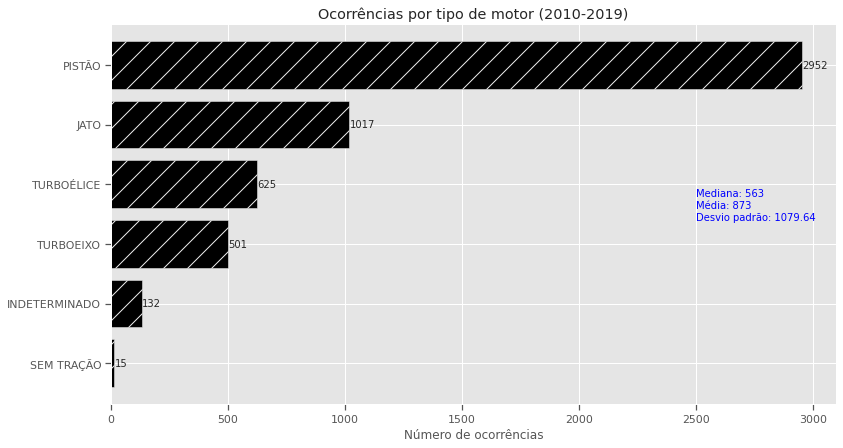

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_motor_tipo
y=contador_motor_tipo

ax.barh(x, y, color='black',hatch='/')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('Ocorrências por tipo de motor (2010-2019)')
plt.text(2500, 2.2, 'Mediana: %d'%(np.median(np.array(contador_motor_tipo))),color='blue')
plt.text(2500, 2.4, 'Média: %d'%(np.mean(np.array(contador_motor_tipo))),color='blue')
plt.text(2500, 2.6, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)),color='blue')
plt.show()

O motor mais frequente nesse período foi a PISTÃO, que representa 56,31% do total de ocorrências, visto que, há um maior volume de motores movidos a pistão em atividade.

O tipo de motor menos frequente foi o Sem tração.

A média de ocorrências por tipo de motor ficou em 873.

O desvio padrão é alto, fruto da discrepância no número de ocorrência x tipo de motor

#Ocorrências por quantidade de motores

In [ ]:
aeronave_motor_quantidade = Counter(dados['aeronave_motor_quantidade'])
fase_aeronave_motor_quantidade = sorted(aeronave_motor_quantidade, key = aeronave_motor_quantidade.get, reverse = True)
contador_aeronave_motor_quantidade = sorted(list(aeronave_motor_quantidade.values()), reverse = True)

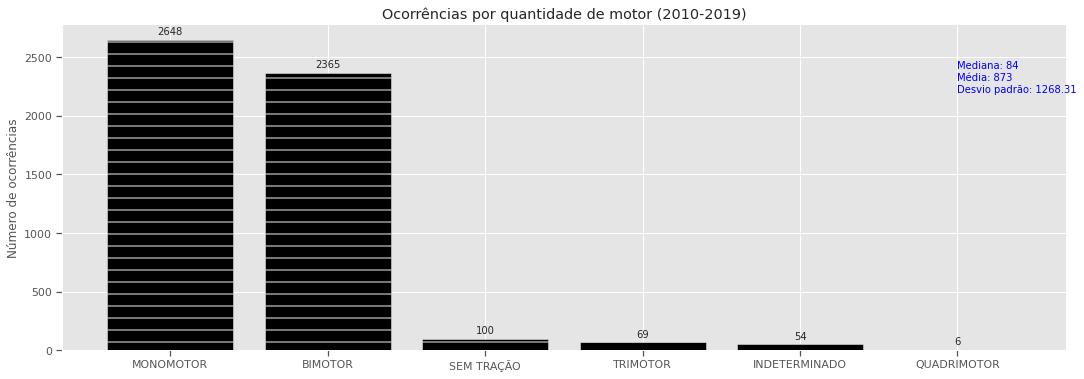

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_aeronave_motor_quantidade
y=contador_aeronave_motor_quantidade

rects1=ax.bar(x, y, color='black',hatch='-')

plt.xlabel('')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por quantidade de motor (2010-2019)')
plt.text(5, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_aeronave_motor_quantidade))),color='blue')
plt.text(5, 2300.4, 'Média: %d'%(np.mean(np.array(contador_aeronave_motor_quantidade))),color='blue')
plt.text(5, 2200.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_motor_quantidade)),color='blue')

numero_em_cima(rects1, ax)

plt.show()

A quantidade de motor mais frequente nesse período foi a Monomotor, que representa 50,51% do total de ocorrências, de acordo com o maior número de aviões que possuem motores monomotores e bimotores, em relação aos demais.

O tipo de motor menos frequente (6) foi o Quadrimotor.

A média de ocorrências por tipo de motor ficou em 873.

#Ocorrência por saída de pista

In [ ]:
ocorrencia_saida_pista = Counter(dados['ocorrencia_saida_pista'])
fase_ocorrencia_saida_pista = sorted(ocorrencia_saida_pista, key = ocorrencia_saida_pista.get, reverse = True)
contador_ocorrencia_saida_pista = sorted(list(ocorrencia_saida_pista.values()), reverse = True)

In [ ]:
ano_sim = list(set(dados['ano']))
todos_sim = list(dados.loc[(dados['ocorrencia_saida_pista']) == 'SIM', ['ano']]
                         ['ano'])
qtd_sim_ano = pd.DataFrame({'ano': ano_sim, 'SIM': [todos_sim.count(i) for i in ano_sim]})
qtd_sim_ano = qtd_sim_ano.sort_values(['SIM'])
soma_sim= qtd_sim_ano['SIM'].sum()

In [ ]:
ano_nao = list(set(dados['ano']))
todos_nao= list(dados.loc[(dados['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
qtd_nao_ano = pd.DataFrame({'ano': ano_nao, 'NÃO': [todos_nao.count(i) for i in ano_nao]})
qtd_nao_ano = qtd_nao_ano.sort_values(['NÃO'])
soma_nao= qtd_nao_ano['NÃO'].sum()

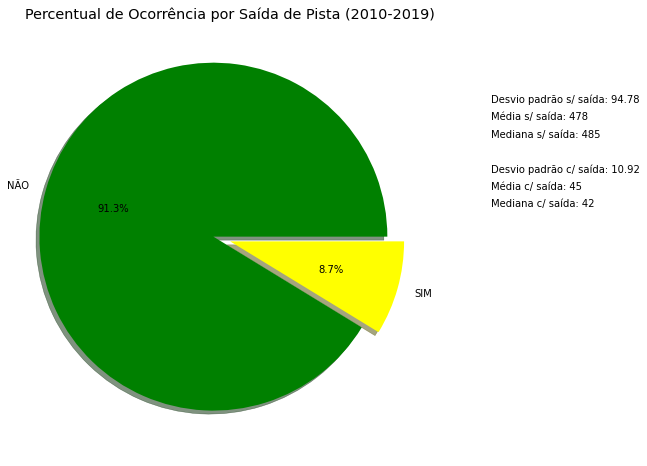

In [ ]:
plt.style.use("ggplot")
plt.title('Percentual de Ocorrência por Saída de Pista (2010-2019)')

explode = (0.1,0)

colors = ['green', 'yellow']

dados['ocorrencia_saida_pista'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,shadow=True ,explode=explode , colors=colors ,figsize=(10, 8))


plt.ylabel('')
plt.text(1.5, 0.2, 'Mediana c/ saída: %d'%(np.median(np.array(qtd_sim_ano['SIM']))))
plt.text(1.5, 0.3, 'Média c/ saída: %d'%(np.mean(np.array(qtd_sim_ano['SIM']))))
plt.text(1.5, 0.4, 'Desvio padrão c/ saída: %.2f'%(static.stdev(qtd_sim_ano['SIM'])))
plt.text(1.5, 0.6, 'Mediana s/ saída: %d'%(np.median(np.array(qtd_nao_ano['NÃO']))))
plt.text(1.5, 0.7, 'Média s/ saída: %d'%(np.mean(np.array(qtd_nao_ano['NÃO']))))
plt.text(1.5, 0.8, 'Desvio padrão s/ saída: %.2f'%(static.stdev(qtd_nao_ano['NÃO'])))

plt.show()

A maioria das ocorrências (91,3%), não ocasionou a saída de pista da aeronave.

A média de ocorrências com saída de pista foi de 45.

O ano que aconteceram mais ocorrências com saída de pistas foi em 2016

A média de ocorrências sem saída de pista foi de 478.

Estes dados são em consequência do alto nivel de segurança aérea no Brasil, onde é seguido meticulosamente as recomendações para pouso, de acordo com cada fabricante.

#Ocorrência por fabricantes

In [ ]:
aeronave_fabricante = Counter(dados['aeronave_fabricante'])
fase_aeronave_fabricante = sorted(aeronave_fabricante, key = aeronave_fabricante.get, reverse = True)
contador_aeronave_fabricante = sorted(list(aeronave_fabricante.values()), reverse = True)

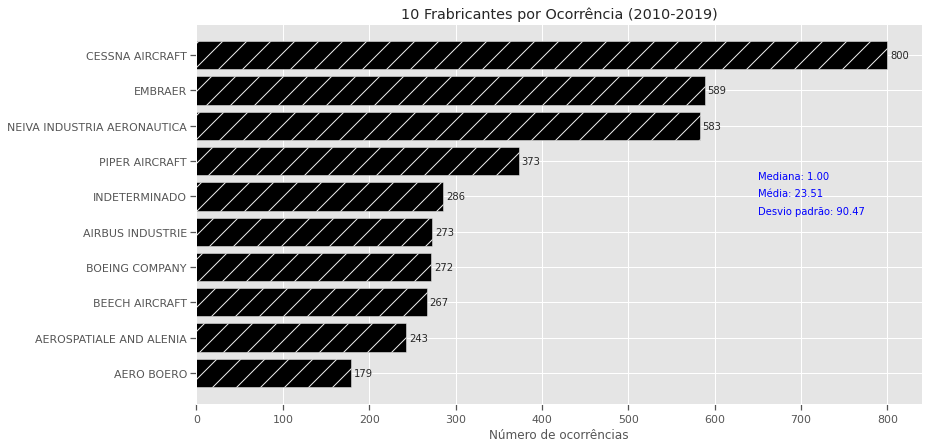

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_aeronave_fabricante[:10]
y=contador_aeronave_fabricante[:10]

ax.barh(x, y, color='black',hatch='/')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')

plt.title('10 Frabricantes por Ocorrência (2010-2019)')
plt.text(650, 3.5, 'Mediana: %.2f'%(np.median(np.array(contador_aeronave_fabricante))),color='blue')
plt.text(650, 4.0, 'Média: %.2f'%(np.mean(np.array(contador_aeronave_fabricante))),color='blue')
plt.text(650, 4.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_fabricante)),color='blue')

plt.show()

O fabricante com mais ocorrências (800) foi o Cessna Aircraft, em razão do número elevado de aeronaves do fabricante em atividade no pais.

A média de ocorrências por fabricante foi de 23,51.

A porcentagem de ocorrências dos 10 fabricantes corresponde a 73,73% do total

#Ocorrência por país-fabricante

In [ ]:
aeronave_pais_fabricante = Counter(dados['aeronave_pais_fabricante'])
fase_aeronave_pais_fabricante = sorted(aeronave_pais_fabricante, key = aeronave_pais_fabricante.get, reverse = True)
contador_aeronave_pais_fabricante = sorted(list(aeronave_pais_fabricante.values()), reverse = True)

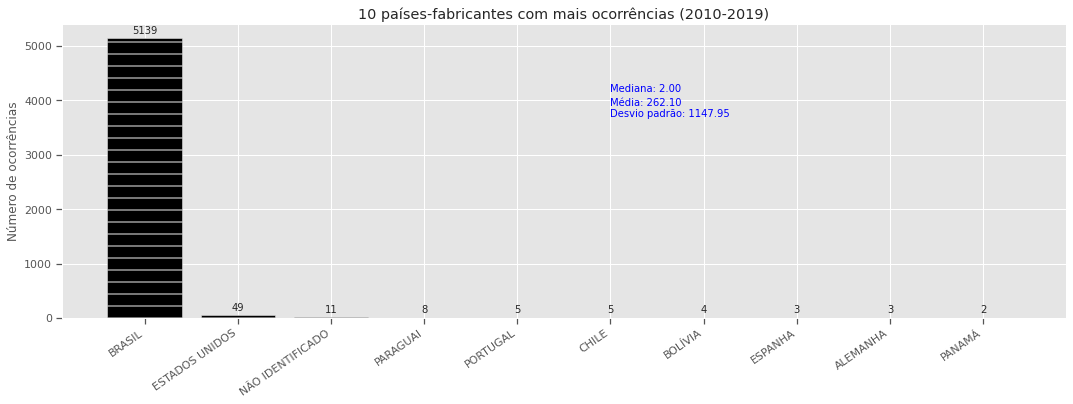

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_aeronave_pais_fabricante[:10]
y=contador_aeronave_pais_fabricante[:10]

rects1=ax.bar(x, y,color='black',hatch='-')

ax.set_xticks(x)
fig.autofmt_xdate(rotation=35)
plt.ylabel("Número de ocorrências")
plt.title('10 países-fabricantes com mais ocorrências (2010-2019)')
plt.text(5, 4159.5, 'Mediana: %.2f'%(np.median(np.array(contador_aeronave_pais_fabricante))),color='blue')
plt.text(5, 3909.0, 'Média: %.2f'%(np.mean(np.array(contador_aeronave_pais_fabricante))),color='blue')
plt.text(5, 3709.4, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave_pais_fabricante)),color='blue')

numero_em_cima(rects1, ax)

plt.show()

O pais fabricante com mais ocorrências (5139) foi o Brasil, em razão do maior volume de aeronaves nacionais em atividades.

O pais fabricante com menos ocorrências foi: Panamá

A média de ocorrências por pais fabricante foi de 262,10.

#Nível de Danos

In [ ]:
aeronave_nivel_dano = Counter(dados['aeronave_nivel_dano'])
fase_aeronave_nivel_dano = sorted(aeronave_nivel_dano, key = aeronave_nivel_dano.get, reverse = True)
contador_aeronave_nivel_dano = sorted(list(aeronave_nivel_dano.values()), reverse = True)

In [ ]:
danos_nenhum = list(set(dados['ano']))
danos = list(dados.loc[(dados['aeronave_nivel_dano']) == 'NENHUM', ['ano']]
                         ['ano'])
qtd_nenhum_ano = pd.DataFrame({'ano': danos_nenhum, 'NENHUM': [danos.count(i) for i in danos_nenhum]})
qtd_nenhum_ano = qtd_nenhum_ano.sort_values(['NENHUM'])
soma_nenhum= qtd_nenhum_ano['NENHUM'].sum()

In [ ]:
danos_leve = list(set(dados['ano']))
danos = list(dados.loc[(dados['aeronave_nivel_dano']) == 'LEVE', ['ano']]
                         ['ano'])
qtd_leve_ano = pd.DataFrame({'ano': danos_leve, 'LEVE': [danos.count(i) for i in danos_leve]})
qtd_leve_ano = qtd_leve_ano.sort_values(['LEVE'])
soma_leve= qtd_leve_ano['LEVE'].sum()

In [ ]:
danos_substancial = list(set(dados['ano']))
danos = list(dados.loc[(dados['aeronave_nivel_dano']) == 'SUBSTANCIAL', ['ano']]
                         ['ano'])
qtd_substancial_ano = pd.DataFrame({'ano': danos_substancial, 'SUBSTANCIAL': [danos.count(i) for i in danos_substancial]})
qtd_substancial_ano = qtd_substancial_ano.sort_values(['SUBSTANCIAL'])
soma_substancial= qtd_substancial_ano['SUBSTANCIAL'].sum()

In [ ]:
danos_destruida = list(set(dados['ano']))
danos = list(dados.loc[(dados['aeronave_nivel_dano']) == 'DESTRUÍDA', ['ano']]
                         ['ano'])
qtd_destruida_ano = pd.DataFrame({'ano': danos_destruida, 'DESTRUÍDA': [danos.count(i) for i in danos_destruida]})
qtd_destruida_ano = qtd_destruida_ano.sort_values(['DESTRUÍDA'])
soma_destruida= qtd_destruida_ano['DESTRUÍDA'].sum()

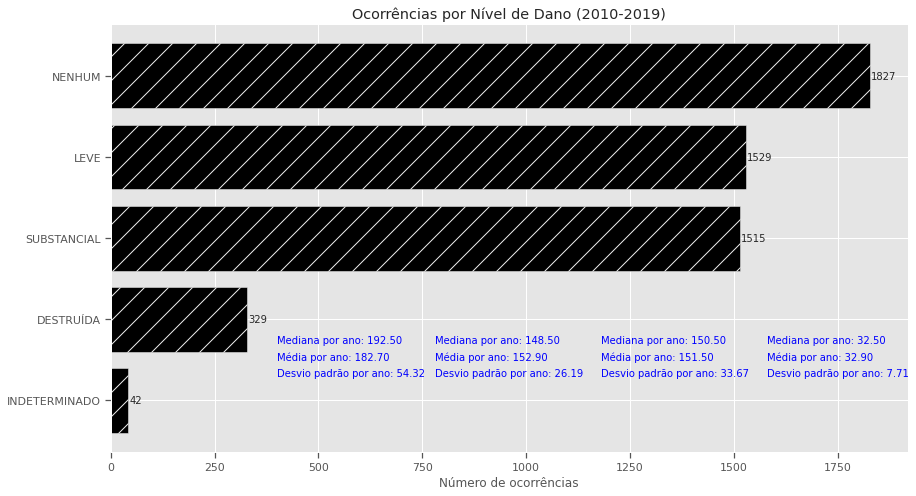

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_aeronave_nivel_dano
y=contador_aeronave_nivel_dano

ax.barh(x, y, color='black',hatch='/')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')

plt.title('Ocorrências por Nível de Dano (2010-2019)')
plt.text(400, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_nenhum_ano['NENHUM']))),color='blue')
plt.text(400, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_nenhum_ano['NENHUM']))),color='blue')
plt.text(400, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_nenhum_ano['NENHUM'])),color='blue')

plt.text(780, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_leve_ano['LEVE']))),color='blue')
plt.text(780, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_leve_ano['LEVE']))),color='blue')
plt.text(780, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_leve_ano['LEVE'])),color='blue')

plt.text(1180, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_substancial_ano['SUBSTANCIAL']))),color='blue')
plt.text(1180, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_substancial_ano['SUBSTANCIAL']))),color='blue')
plt.text(1180, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_substancial_ano['SUBSTANCIAL'])),color='blue')

plt.text(1580, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_destruida_ano['DESTRUÍDA']))),color='blue')
plt.text(1580, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_destruida_ano['DESTRUÍDA']))),color='blue')
plt.text(1580, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_destruida_ano['DESTRUÍDA'])),color='blue')
plt.tight_layout(w_pad=4, h_pad=3)

A maior parte das ocorrências (1827) não gerou dano à aeronave, visto que, o maior número de ocorrências são incidentes.

A menor parte das ocorrências (42) no período, gerou danos indeterminados.

A média de ocorrências sem nenhum danos foram de 182,70 por ano.

A média de ocorrências com danos leves foram de 152,90 por ano.

A média de ocorrências com danos substanciais foram de 151,50 por ano.

A média de ocorrências destruindo a aeronave foram de 32,90 por ano.

#Status da Investigação

In [ ]:
status_finalizada= list(set(dados['ano']))
dados_status_finalizada = list(dados.loc[(dados['status_investigacao']) == 'FINALIZADA', ['ano']]
                         ['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

In [ ]:
status_ativa= list(set(dados['ano']))
dados_status_ativa = list(dados.loc[(dados['status_investigacao']) == 'ATIVA', ['ano']]
                         ['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

In [ ]:
status_indeterminada= list(set(dados['ano']))
dados_status_indeterminada = list(dados.loc[(dados['status_investigacao']) == 'INDETERMINADA', ['ano']]
                         ['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

In [ ]:
status_investigacao = Counter(dados['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

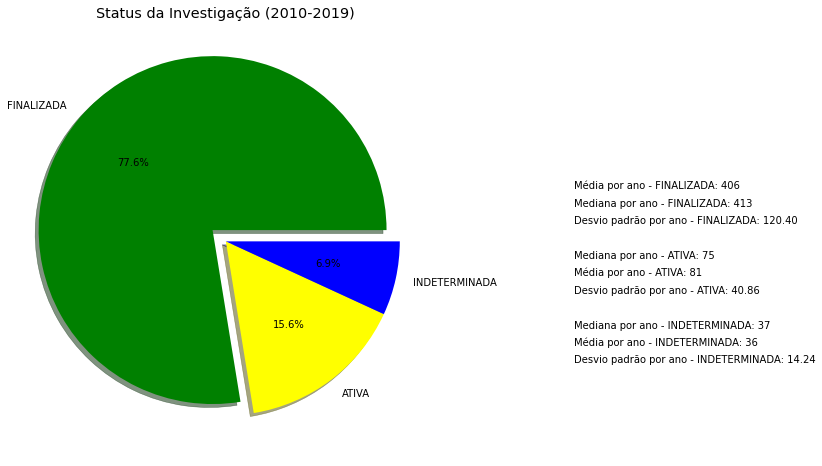

In [ ]:
plt.style.use("ggplot")

colors = ['green', 'yellow', 'blue',]

explode = (0.1,0,0)

plt.title('Status da Investigação (2010-2019)')
plt.text(2, 0.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])))

plt.text(2, -0.1, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.2, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.3, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])))

plt.text(2, -0.5, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.6, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.7, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])))

status = dados['status_investigacao'].value_counts().plot(kind='pie',autopct='%1.1f%%',label='',shadow=True ,explode=explode , colors=colors ,figsize=(15,8))

A maior parte das ocorrências (4066) Tiveram sua investigação finalizada, representando 77,6% do total investigado, pois a maior parte das ocorrências são de gravidade baixa.

A menor parte das ocorrências (360) tiveram sua investigação indeterminada, representando 6,9% do total

A média de ocorrências finalizada foi de 413 por ano.

A média de ocorrências ativa foi de 81 por ano.

A média de ocorrências indeterminada foi de 36 por ano.

#Liberação da aeronave

In [ ]:
aeronave_liberada = list(set(dados['ano']))
todas_aeronave_liberada = list(dados.loc[(dados['aeronave_liberada']) == 'SIM', ['ano']]
                         ['ano'])
qtd_aeronave_liberada_ano = pd.DataFrame({'ano': aeronave_liberada, 'SIM': [todas_aeronave_liberada.count(i) for i in aeronave_liberada]})
qtd_aeronave_liberada_ano = qtd_aeronave_liberada_ano.sort_values(['SIM'])
total_qtd_aeronave_liberada_ano= qtd_aeronave_liberada_ano['SIM'].sum()

In [ ]:
aeronave_nao_liberada = list(set(dados['ano']))
todas_aeronave_nao_liberada= list(dados.loc[(dados['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
qtd_nao_liberada_ano = pd.DataFrame({'ano': aeronave_nao_liberada, 'NÃO': [todas_aeronave_nao_liberada.count(i) for i in aeronave_nao_liberada]})
qtd_nao_liberada_ano = qtd_nao_liberada_ano.sort_values(['NÃO'])
total_qtd_nao_liberada_ano= qtd_nao_liberada_ano['NÃO'].sum()

In [ ]:
aeronave_indeterminada = list(set(dados['ano']))
todas_aeronave_indeterminada= list(dados.loc[(dados['ocorrencia_saida_pista']) == 'INDETERMINADO', ['ano']]
                         ['ano'])
qtd_aeronave_indeterminada_ano = pd.DataFrame({'ano': aeronave_indeterminada, 'INDETERMINADO': [todas_aeronave_indeterminada.count(i) for i in aeronave_indeterminada]})
qtd_aeronave_indeterminada_ano = qtd_aeronave_indeterminada_ano.sort_values(['INDETERMINADO'])
total_qtd_aeronave_indeterminada_ano= qtd_aeronave_indeterminada_ano['INDETERMINADO'].sum()

In [ ]:
aeronave_liberada = Counter(dados['aeronave_liberada'])
fase_aeronave_liberada = sorted(aeronave_liberada, key = aeronave_liberada.get, reverse = True)
contador_aeronave_liberada = sorted(list(aeronave_liberada.values()), reverse = True)

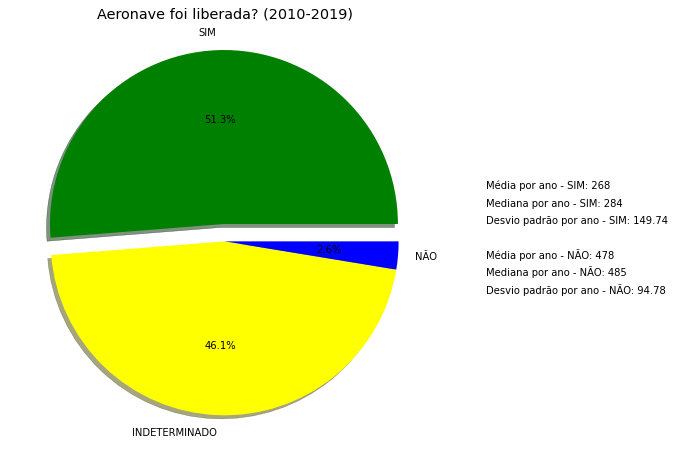

In [ ]:
plt.style.use("ggplot")

colors = ['green', 'yellow', 'blue',]

explode = (0.1,0,0)

plt.title('Aeronave foi liberada? (2010-2019)')

plt.text(1.5, 0.2, 'Mediana por ano - SIM: %d'%(np.median(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.3, 'Média por ano - SIM: %d'%(np.mean(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.1, 'Desvio padrão por ano - SIM: %.2f'%(static.stdev(qtd_aeronave_liberada_ano['SIM'])))

plt.text(1.5, -0.2, 'Mediana por ano - NÃO: %d'%(np.median(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.1, 'Média por ano - NÃO: %d'%(np.mean(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.3, 'Desvio padrão por ano - NÃO: %.2f'%(static.stdev(qtd_nao_liberada_ano['NÃO'])))

status = dados['aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.1f%%',label='' ,shadow=True ,explode=explode , colors=colors,figsize=(15,8))

A maior parte das ocorrências (4784) teve sua aeronave liberada, representando 51,3% do total de liberações

Não houve ocorrências onde a aeronave não foi liberada após investigação da CENIPA, visto que, não houveram danos graves a mesma.

A média de ocorrências com a aeronave liberada foi de 268 por ano.

A média de ocorrências com a aeronave indeterminada foi de 485 por ano.

#Assentos na aeronave

In [ ]:
aeronave_assentos = Counter(dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

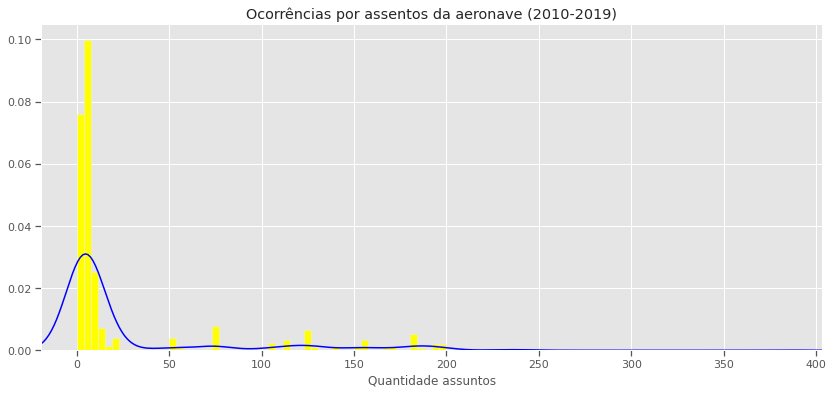

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x= dados.aeronave_assentos
plt.hist(x, density=True, bins= 100,color='yellow')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",color='blue')
plt.xlabel('Quantidade assuntos')
plt.title('Ocorrências por assentos da aeronave (2010-2019)')

plt.show()

A quantidade de assentos por aeronave com ocorrências mais frequente nesse período foi de 6 assentos, que representam 16,84% do total de ocorrências.

A média de ocorrências por quantidade de assentos ficou em 60,25 neste período, em razão a quantidade de aeronaves com elevado número de assentos.

#Aeronaves envolvidas

In [ ]:
aeronave_uma = list(set(dados['ano']))
todas_aeronave_uma= list(dados.loc[(dados['aeronaves_envolvidas']) == 1, ['ano']]
                         ['ano'])
qtd_aeronave_uma_ano = pd.DataFrame({'ano': aeronave_uma, 'aeronave': [todas_aeronave_uma.count(i) for i in aeronave_uma]})
qtd_aeronave_uma_ano = qtd_aeronave_uma_ano.sort_values(['aeronave'])
total_qtd_aeronave_uma_ano= qtd_aeronave_uma_ano['aeronave'].sum()

In [ ]:
aeronave_duas = list(set(dados['ano']))
todas_aeronave_duas= list(dados.loc[(dados['aeronaves_envolvidas']) == 2, ['ano']]
                         ['ano'])
qtd_aeronave_duas_ano = pd.DataFrame({'ano': aeronave_duas, 'aeronave': [todas_aeronave_duas.count(i) for i in aeronave_duas]})
qtd_aeronave_duas_ano = qtd_aeronave_duas_ano.sort_values(['aeronave'])
total_qtd_aeronave_duas_ano= qtd_aeronave_duas_ano['aeronave'].sum()

In [ ]:
aeronaves_envolvidas = Counter(dados['aeronaves_envolvidas'])
fase_aeronaves_envolvidas = sorted(aeronaves_envolvidas, key = aeronaves_envolvidas.get, reverse = True)
contador_aeronaves_envolvidas = sorted(list(aeronaves_envolvidas.values()), reverse = True)

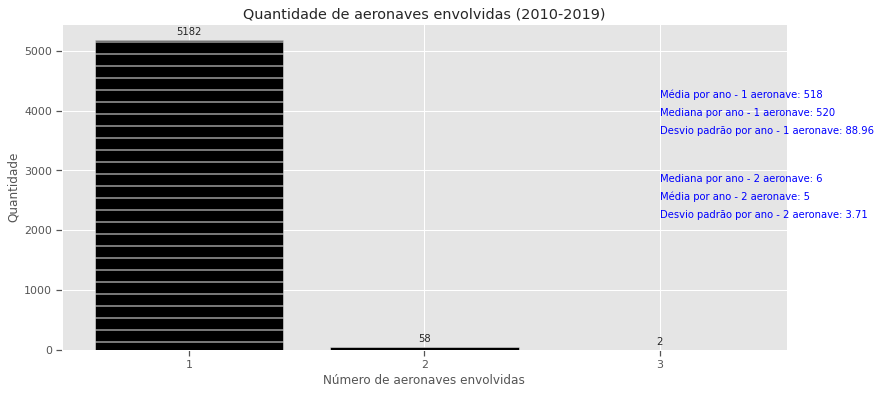

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 6))

x=fase_aeronaves_envolvidas
y=contador_aeronaves_envolvidas

rects1=ax.bar(x, y,color='black', hatch = '-')
ax.set_xticks(x)
plt.ylabel("Quantidade")
plt.xlabel("Número de aeronaves envolvidas")
plt.title('Quantidade de aeronaves envolvidas (2010-2019)')
plt.text(3, 4209.9, 'Média por ano - 1 aeronave: %d'%(np.mean(np.array(qtd_aeronave_uma_ano['aeronave']))),color='blue')
plt.text(3, 3909.9, 'Mediana por ano - 1 aeronave: %d'%(np.median(np.array(qtd_aeronave_uma_ano['aeronave']))),color='blue')  
plt.text(3, 3609.7, 'Desvio padrão por ano - 1 aeronave: %.2f'%(static.stdev(qtd_aeronave_uma_ano['aeronave'])),color='blue')

plt.text(3, 2809.9, 'Mediana por ano - 2 aeronave: %d'%(np.median(np.array(qtd_aeronave_duas_ano['aeronave']))),color='blue')  
plt.text(3, 2509.9, 'Média por ano - 2 aeronave: %d'%(np.mean(np.array(qtd_aeronave_duas_ano['aeronave']))),color='blue')
plt.text(3, 2209.7, 'Desvio padrão por ano - 2 aeronave: %.2f'%(static.stdev(qtd_aeronave_duas_ano['aeronave'])),color='blue')


numero_em_cima(rects1, ax)


plt.show()

A maior parte das ocorrências (5182) teve o envolvimento de 1 aeronave, representando 98,85% do total de liberações, isto se dá pelos processos de segurança envolvidos, que anulam as chances de ocorrências com mais de 1 aeronave.

Pode-se inferir que as ocorrências em voo ou envolve situações onde o fato(ocorrência) acontece a bordo ou por agentes externos (ex: colisão com aves , passaros e etc)

A média de ocorrências com 1 aeronave foi de 520 por ano.

A média de ocorrências com 2 aeronave foi de 5 por ano.

#Horário da Ocorrência

In [ ]:
hora = Counter(dados['hora'])
fase_hora = sorted(hora, key = hora.get, reverse = True)
contador_hora = sorted(list(hora.values()), reverse = True)


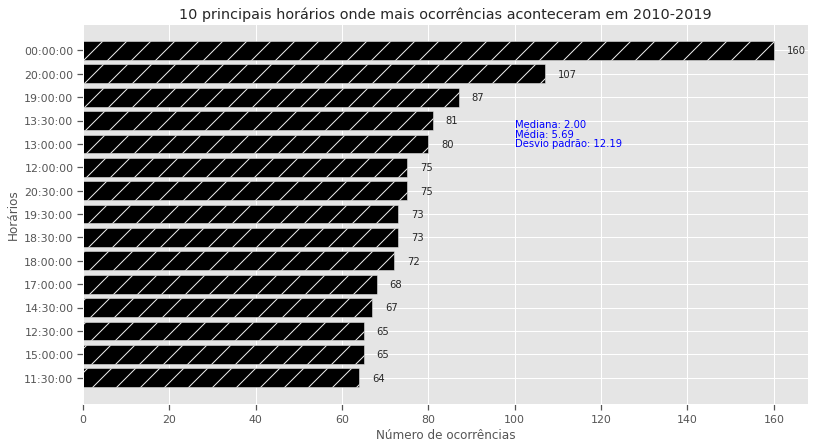

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7)) 

x=fase_hora[:15]
y=contador_hora[:15]

ax.barh(x, y, color='black',hatch='/')
hatch = '-'
for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()

plt.xlabel('Número de ocorrências')
plt.ylabel('Horários')
plt.title('10 principais horários onde mais ocorrências aconteceram em 2010-2019')

plt.text(100, 3.3, 'Mediana: %.2f'%(np.median(np.array(contador_hora))),color='blue')
plt.text(100, 3.7, 'Média: %.2f'%(np.mean(np.array(contador_hora))),color='blue')
plt.text(100, 4.1, 'Desvio padrão: %.2f'%(static.stdev(contador_hora)),color='blue')

plt.show()

Os horários com mais ocorrências (160) foi as 00:00.

A média de ocorrências por horário foi de 5,69.

A quantidades dos 10 horários com mais ocorrências representa 16,84% do total de ocorrências.

Entendemos que, a quantidades de ocorrências em períodos noturnos, está relacionada ao tipo de ocorrência, visto que, temos altos niveis ocorrências em pouso.

#Quebra de dados em conjunto de treino e conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split

dados['tipo'] = dados['tipo'].replace('INCIDENTE', 0)
dados['tipo'] = dados['tipo'].replace('INCIDENTE GRAVE', 1)
dados['tipo'] = dados['tipo'].replace('ACIDENTE', 2)

dados['aeronave_liberada'] = dados['aeronave_liberada'].replace('INDETERMINADO', 0)
dados['aeronave_liberada'] = dados['aeronave_liberada'].replace('SIM', 1)
dados['aeronave_liberada'] = dados['aeronave_liberada'].replace('NÃO', 2)

dados['status_investigacao'] = dados['status_investigacao'].replace('INDETERMINADA', 0)
dados['status_investigacao'] = dados['status_investigacao'].replace('FINALIZADA', 1)
dados['status_investigacao'] = dados['status_investigacao'].replace('ATIVA', 2)

dados['aeronave_nivel_dano'] = dados['aeronave_nivel_dano'].replace('NENHUM', 0)
dados['aeronave_nivel_dano'] = dados['aeronave_nivel_dano'].replace('LEVE', 1)
dados['aeronave_nivel_dano'] = dados['aeronave_nivel_dano'].replace('SUBSTANCIAL', 2)
dados['aeronave_nivel_dano'] = dados['aeronave_nivel_dano'].replace('DESTRUÍDA', 3)
dados['aeronave_nivel_dano'] = dados['aeronave_nivel_dano'].replace('INDETERMINADO', 4)

dados['ocorrencia_saida_pista'] = dados['ocorrencia_saida_pista'].replace('NÃO', 0)
dados['ocorrencia_saida_pista'] = dados['ocorrencia_saida_pista'].replace('SIM', 1)


y = dados['aeronave_assentos']
x = dados.drop(['aeronave_assentos', "descricao","cidade", "estado", "hora",
                 "aeronave_tipo", "aeronave_pais_fabricante", "aeronave_fase_operacao",
                 "data", "aeronave_fabricante", 
                "aeronave_motor_quantidade", "motor_tipo"], axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)
print(dados.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(5242, 23) (3669, 11) (1573, 11) (3669,) (1573,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
logreg_model = LinearRegression()

In [ ]:
logreg_model.fit(x_treino, y_treino)

LinearRegression()

#Verifica o desempenho do estimador do scikit-learn no conjunto de teste

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = logreg_model.predict(x_teste)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_teste, y_pred):1.0f}")

Acurácia de Teste: ±33


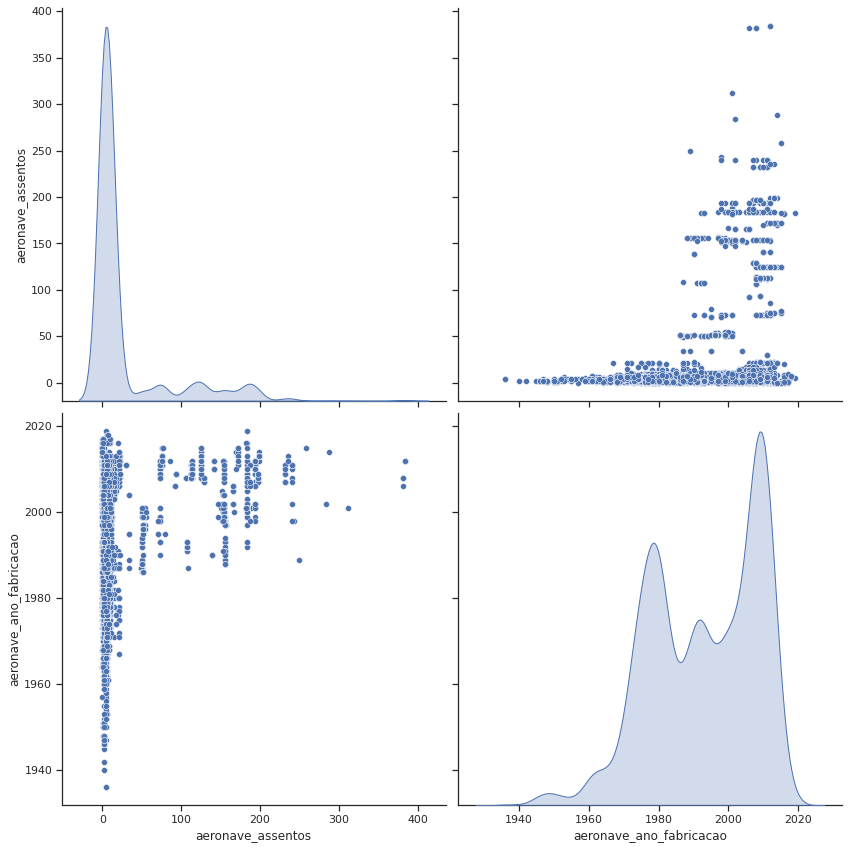

In [ ]:
df = dados.drop(dados.loc[dados['aeronave_ano_fabricacao']==0].index, inplace=True)
df = dados.drop(dados.loc[dados['aeronave_ano_fabricacao']==9999].index, inplace=True)

pair_col1 = ['aeronave_assentos', 'aeronave_ano_fabricacao']

sns.set_theme(style="ticks") 

def pairplot(df, column_list):

    sns.pairplot(dados[column_list], kind='scatter', diag_kind='kde',height=6,)
    plt.show()
    
pairplot(df, pair_col1)

In [ ]:
import statsmodels.api as sm

X = dados['aeronave_ano_fabricacao']
y = dados['aeronave_assentos']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      aeronave_assentos   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     726.7
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          2.33e-149
Time:                        22:35:49   Log-Likelihood:                -26136.
No. Observations:                4896   AIC:                         5.228e+04
Df Residuals:                    4894   BIC:                         5.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

#Regressão Linear - Número de assentos

In [ ]:
dataframe = pd.DataFrame()
dataframe['x'] = dados['aeronave_ano_fabricacao']
dataframe['y'] = dados['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

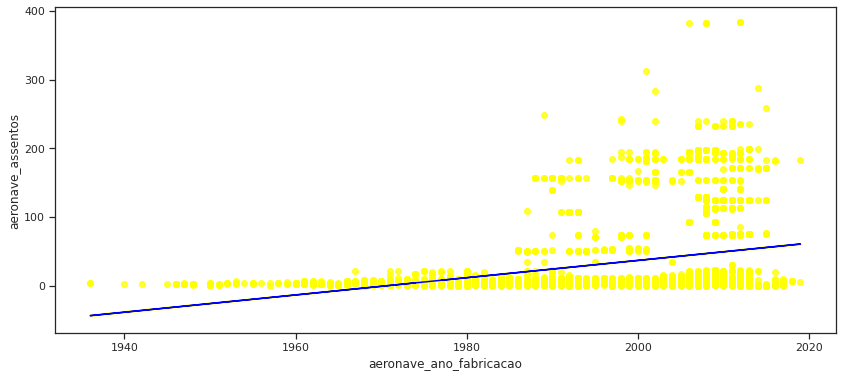

In [ ]:
plt.figure(figsize=(14,6))

sns.regplot(x='aeronave_ano_fabricacao', y='aeronave_assentos', data=dados, color='yellow')
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r', color='blue')
plt.show()

O gráfico representa o eixo X com o anos de fabricação de aeronaves que se envolveram em alguma ocorrência, já o eixo Y do gráfico representa a quantidade de assentos dessas aeronaves. Nota-se que o número de assentos foi crescendo no decorrer dos anos, principalmente pós-Segunda Guerra Mundial (1939-1945), já que a avião tornou-se um veículo predominantemente cívil, suplatando o uso militar.

É possível verificar pelo gráfico que há uma tendência de alta destas ocorrências, analisando a linha em vermelho. Levando em consideração que cada vez mais há aviões levantando voo - em média 743 voos diários (MERCADOEEVENTOS, 2020) - e mais passageiros sendo transportados - em 2018, foram 100,87 milhões de pessoas (AGENCIAEBC, 2018) - as ocorrências serão mais constantes.

Observa-se também que há mais ocorrências em aviões de pequeno porte (configuração para passageiros com menos de 31 assentos - (ANAC, 2019)), o que pode levar a conclusão que os protocolos de segurança são falhos para este tipo de aeronave (BBC, 2021).

In [ ]:
aeronave_assentos = Counter(dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

In [ ]:
dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

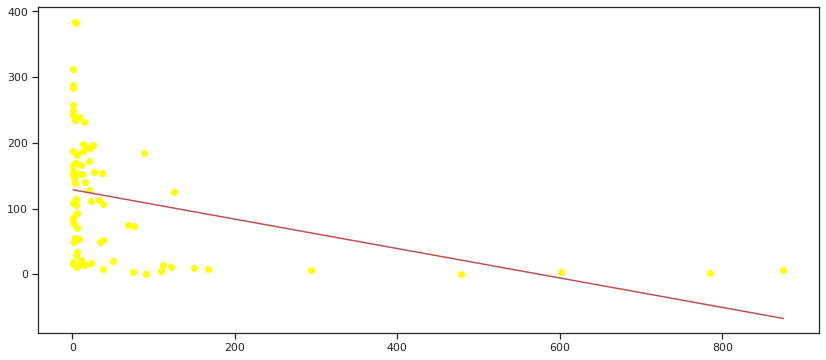

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values,color='yellow')


fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

O gráfico representa o eixo X como a quantidade de ocorrências de acidentes aéreos ocorridos em território brasileiro, já o eixo Y do gráfico representa a quantidade de assentos das aeronaves. Nota-se que o número de assentos foi decaindo pois à medida que foram tendo mais ocorrências, o número de assentos foi diminuindo.

Analisando os pontos vermelhos apresentados que se referem às ocorrências devido aos assentos aéreos, notamos que quanto menor for o número de assentos, maior a quantidade de ocorrências de acidentes, o que nos leva a avaliar o protocolo de segurança das aeronaves com menor número de assentos.

Reavaliar o protocolo de segurança de aeronaves de pequeno porte, acompanhar e ter um maior controle sobre as regras e leis que seguem as aeronaves de grande porte pode ser um fator crucial como medida para melhoria no problema representado pelo gráfico acima (BBC, 2021).

O estudo de ocorrências de acidentes aéreos com aeronaves com pouco número em sua quantidade de assentos, a comparação com o protocolo de segurança imposto e o movimento de implementação de novos protocolos a serem seguidos poderiam diminuir a quantidade de ocorrências de acidentes das aeronaves com menor número de assentos.

De forma ilustrativa, o gráfico apresenta e é possível identificar que de 150 casos, passaram a ser -800 os casos de ocorrências referente aos assentos, ocasionando uma melhora nítida.

#Considerações Finais

*O* principal objetivo deste trabalho é realizar o levantamento estatístico de acidentes aéreos ocorridos em território brasileiro, entre os anos de 2010 a 2019, buscando apresentar, de forma gráfica, informações que envolvem a aviação nacional.

O conteúdo deste documento levou em consideração os dados disponibilizados na plataforma Github.

As principais ocorrências abordadas serão: região, tipo de aeronave, principais ocorrências e ocorrências por fabricante entre outros.

Os principais resultados da análise foram: 

*   As aeronaves mais afetadas são os aviões com 4.213 mil acidentes, destacando-se as aeronaves com até 6 acentos, monomotores com fabricação de 2008.
*   A principal falha desses aviões são os pistões do motor que representam um total de 56,31 % dos problemas da aeronave, já a fabricante Cessna Aircraft foi a responsável tem um total de 800 casos ou 23,51% do total.
*   Os acidentes em sua grande maioria são leves correspondendo a 55,1% do total, com o mês de janeiro sendo o mês com mais incidentes no ano, já o Sudeste representa a região que mais concentra ocorrências em números absolutos sendo São Paulo o estado mais afetado.

#Relatório Final

O presente trabalho buscou apresentar, de forma ilustrativa, o panorama de informações que envolvem a aviação brasileira desse tipo de aeronave entre os anos de 2010 a 2019. 

É de fundamental importância compreender que o conteúdo deste documento procurou ater-se aos dados coletados e produzidos pelo CENIPA (dados primários), abstendo-se, na medida do possível, de qualquer tipo de análise ou dados de terceiros. 

principal objetivo desta publicação é o compartilhamento de informações detalhadas sobre ocorrências com aeronaves de asa fixa. 
No tratamento dos dados, nota-se que a maioria dos casos são de fatores externos e que a maioria dos casos tiveram poucos danos a aeronave ou quase nenhum. 

Dentro dessa análise, percebe-se que as investigações realizadas sobre estas ocorrências teve finalidade, sendo o maior número de ocorrências registradas pelo CENIPA no ano de 2013 e o menor em 2016. 
Quando se trata de incidentes aeronáuticos, todos os envolvidos são necessários e mobilizados para o apoio e investigação, seguindo assim os protocolos e regras estabelecidas. 

Por fim conseguimos estabelecer algumas características nos incidentes, sendo eles: os fatores que causaram o incidente/incidente grave/acidente, a média de incidentes por ano, cidade, horários, tipos de aeronaves e o nível de dano causado. 

A ocorrência que mais se apresenta é a falha do motor durante o voo, opondo-se a colisão com objetos durante a decolagem e o pouso que apresentaram os menores dados. 

Conclui-se que o número de incidentes são menores, isso comparado ao número de aeronaves que decolam todos os dias durante o ano, porém não são nulos os ocorridos.

#Referências Bibliográficas


CENIPA, FCA 58-1 Ocorrências Aeronáuticas: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronáuticos. 2016.

CAMARA, Gilberto; ASSIS, Luiz F.; QUEIROZ, Gilberto R.;FERREIRA, Karine R.; LLAPA, Eduardo; VINHAS, Lubia. Big earth observation data analytics: matching requirements to system architectures. Proceedings of the 5th ACM SIGSPATIAL International Workshop on Analytics for Big Geospatial Data. 2016.

CHOUDHARY, Jayvant; OHRI, Anurag; KUMAR, Brind. Identification of Road Accidents Hot Spots in Varanasi using QGIS. Proceedings of National Conference on Open Source GIS: Opportunities and Challenges Department of Civil Engineering, IIT(BHU), 2015.

EMC. Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data. Wiley, EMC Education Services, 1st Edition, 2015, 399 p.

GRUS, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media, Inc., 1st ed., 2015, 330 p.

WAGNER, Michael; LLORT, Gérman; MERCADAL, Estanislao;GIMÉNEZ, Judit; LABARTA, Jesús. Performance Analysis of Parallel Python Applications. Proceeding of International Conference on Computational Science, ICCS. 2017.

COUTINHO, Thiago. **Introdução a Biblioteca Pandas**. medium,[S.I.], 2020.Disponível em:https://medium.com/tech-grupozap/introdu%C3%A7%C3%A3o-a-biblioteca-pandas-89fa8ed4fa38. Acesso em: 18 de jun. 2022

JUNIOR, Luiz S.. **Entendendo a biblioteca NumPy**. Medium, [S.I.], 2018.Disponível em:https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355. Acesso em: 17  de jun. 2022

UFPR. **4. SciPy**. [S.I.]. [?]. Disponível em:http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/capitulo-4-scipy. Acesso em: 17  de jun. 2022

MACHADO, Alysson. **Biblioteca Matplotlib do Python**. Medium, [S.I.], 2020.Disponível em:https://medium.com/@alyssonmachado388/biblioteca-matplotlib-do-python-5e32104439d0. Acesso em: 17  de jun. 2022

SCHÖNHOFEN, Ricardo D.. **Biblioteca Seaborn com o matplotlib**. Vooo, [S.I.],2017.Disponível em:https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/. Acesso em: 17  de jun. 2022

PYTHON. **Collections — Tipos de dados do contêiner**. [S.I.], [?] ,Disponível em:
https://docs.python.org/3/library/collections.html. Acesso em: 17  de jun. 2022

REGIS, Igor. **Brasil chegará a 743 voos diários até o fim do mês; 31% do pré-pandemia**. Mercado & Eventos, [S.I], 2020. Disponível em:https://www.mercadoeeventos.com.br/noticias/aviacao/brasil-chegara-a-743-voos-diarios-ate-o-fim-do-mes-31-do-pre-pandemia/. Acesso em: 17  de jun. 2022

G1. **Brasileiros estão viajando mais de avião que de ônibus**. [S.I], 2010. Disponível em:http://g1.globo.com/bom-dia-brasil/noticia/2010/08/brasileiros-estao-viajando-mais-de-aviao-que-de-onibus.html. Acesso em: 17  de jun. 2022

NASCIMENTO, Luciano. **Anac: mais de 100 milhões de pessoas viajaram de avião no último ano**. Agência Brasil, Brasília, 2018. Disponível em:
https://agenciabrasil.ebc.com.br/economia/noticia/2018-07/anac-mais-de-100-milhoes-de-pessoas-viajaram-de-aviao-no-ultimo-ano. Acesso em: 17  de jun. 2022

Felipe; MACHADO, Leandro. **Morte de Marília Mendonça: acidentes com aviões de pequeno porte são grande maioria no Brasil**. BBC News Brasil, São Paulo, 2021 .Disponível em:
https://www.bbc.com/portuguese/brasil-59185456. Acesso em: 17  de jun. 2022
